In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_india = df[(df['job_country'] == 'India')].dropna(subset = ['salary_year_avg'])

In [31]:
job_titles = ['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer']

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer']

In [32]:
df_india_top6 = df_india[df_india['job_title_short'].isin(job_titles)]

In [33]:
job_order = df_india_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index.tolist()

job_order

['Senior Data Scientist',
 'Data Engineer',
 'Senior Data Engineer',
 'Data Scientist',
 'Senior Data Analyst',
 'Data Analyst']

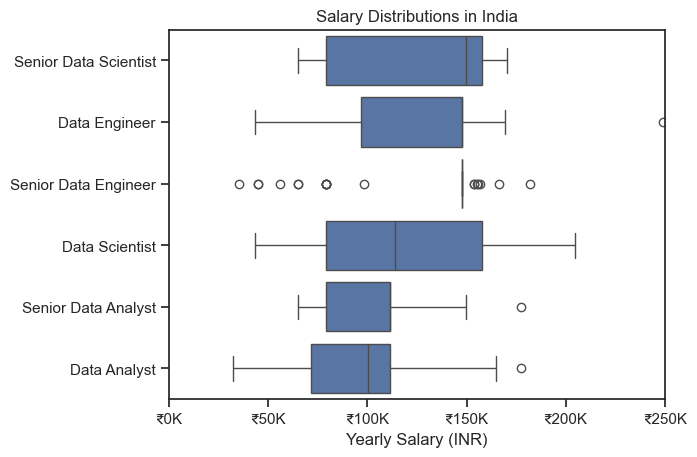

In [53]:
sns.boxplot(data=df_india_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')

# this is all the same
plt.title('Salary Distributions in India')
plt.xlabel('Yearly Salary (INR)')
plt.ylabel('')
plt.xlim(0, 250000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'₹{int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts

In [37]:
# Only get data analyst jobs in India
df_da_india = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_da_india = df_da_india.dropna(subset=['salary_year_avg'])

df_da_india = df_da_india.explode('job_skills')

df_da_india[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


In [47]:
df_da_top_pay = df_da_india.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False).head(10)
df_da_top_pay

,count,median
job_skills,,
pyspark,1,165000.0
linux,1,165000.0
gitlab,1,165000.0
mysql,1,165000.0
postgresql,1,165000.0
mongodb,6,163782.0
gdpr,2,163782.0
neo4j,1,163782.0
databricks,3,163782.0


In [45]:
df_da_skills = df_da_india.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False).head(10)

df_da_skills = df_da_skills.sort_values(by='median', ascending=False)

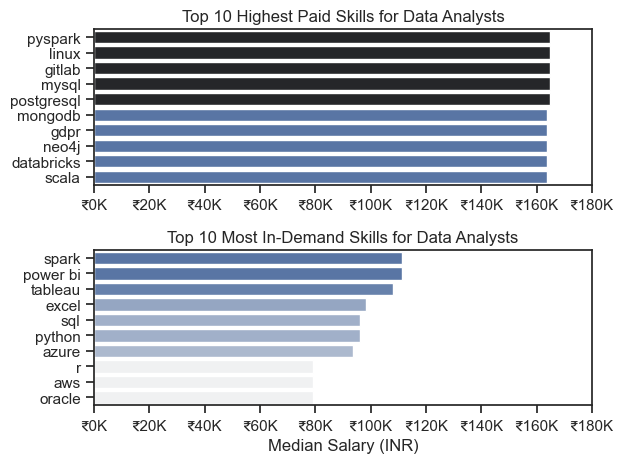

In [52]:
fig, ax = plt.subplots(2, 1)  

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_da_top_pay, x='median', y=df_da_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xlim(0, 180000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analystsr')
sns.barplot(data=df_da_skills, x='median', y=df_da_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (INR)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{int(x/1000)}K'))

plt.tight_layout()
plt.show()